In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 2.9 MB/s eta 0:00:00


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats


sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

data = pd.read_csv("/content/sample_data/Dataset of Diabetes .csv")
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,735,34221,M,26,4.50,62,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,420,47975,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,680,87656,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,504,34223,M,33,7.10,46,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         230 non-null    int64  
 1   No_Pation  230 non-null    int64  
 2   Gender     230 non-null    object 
 3   AGE        230 non-null    int64  
 4   Urea       230 non-null    float64
 5   Cr         230 non-null    int64  
 6   HbA1c      230 non-null    float64
 7   Chol       230 non-null    float64
 8   TG         230 non-null    float64
 9   HDL        230 non-null    float64
 10  LDL        230 non-null    float64
 11  VLDL       230 non-null    float64
 12  BMI        230 non-null    float64
 13  CLASS      230 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 25.3+ KB


In [38]:
data = data.drop(columns=['ID', 'No_Pation'])

In [39]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,M,26,4.50,62,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,M,33,7.10,46,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N


In [40]:
data.shape

(230, 12)

In [125]:
data['CLASS'] = data['CLASS'].replace({'N': 0, 'Y': 1})

In [42]:
data.shape

(230, 12)

In [43]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0.00
1,M,26,4.50,62,4.90,3.70,1.40,1.10,2.10,0.60,23.00,0.00
2,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0.00
3,F,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0.00
4,M,33,7.10,46,4.90,4.90,1.00,0.80,2.00,0.40,21.00,0.00


In [44]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00
mean,49.38,5.29,67.54,6.90,4.76,2.18,1.22,2.63,1.21,26.40
std,11.26,3.56,33.19,2.69,1.39,1.34,0.44,1.08,1.74,4.96
min,20.00,1.80,6.00,0.90,0.00,0.60,0.50,0.30,0.20,19.00
25%,42.00,3.62,47.25,4.90,3.80,1.30,0.90,1.80,0.60,22.00
50%,50.00,4.60,59.50,6.75,4.60,1.85,1.10,2.60,0.80,24.00
75%,56.00,5.70,79.00,8.50,5.50,2.70,1.30,3.30,1.20,30.00
max,77.00,38.90,228.00,16.00,9.80,11.60,4.00,7.90,15.40,40.50


In [45]:
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

In [46]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00
mean,49.38,5.29,67.54,6.90,4.76,2.18,1.22,2.63,1.21,26.40
std,11.26,3.56,33.19,2.69,1.39,1.34,0.44,1.08,1.74,4.96
min,20.00,1.80,6.00,0.90,0.00,0.60,0.50,0.30,0.20,19.00
25%,42.00,3.62,47.25,4.90,3.80,1.30,0.90,1.80,0.60,22.00
50%,50.00,4.60,59.50,6.75,4.60,1.85,1.10,2.60,0.80,24.00
75%,56.00,5.70,79.00,8.50,5.50,2.70,1.30,3.30,1.20,30.00
max,77.00,38.90,228.00,16.00,9.80,11.60,4.00,7.90,15.40,40.50


In [56]:
data.CLASS.value_counts()

CLASS
1.0    123
0.0    103
Name: count, dtype: int64

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
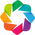

:Bars   [CLASS]   (count)

In [61]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
data.CLASS.value_counts().hvplot.bar(
    title="Diabetics Count", xlabel='Diabetics', ylabel='Count',
    width=500, height=350
)

In [62]:
data.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [64]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [118]:
data[['Gender', 'CLASS']] = data[['Gender', 'CLASS']].astype(str)

numeric_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
data[numeric_columns] = data[numeric_columns].astype(float)
data.info()

for column in data.columns:
    print(column, data[column].unique())

print(data['Gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 0 to 225
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  225 non-null    object 
 1   AGE     225 non-null    float64
 2   Urea    225 non-null    float64
 3   Cr      225 non-null    float64
 4   HbA1c   225 non-null    float64
 5   Chol    225 non-null    float64
 6   TG      225 non-null    float64
 7   HDL     225 non-null    float64
 8   LDL     225 non-null    float64
 9   VLDL    225 non-null    float64
 10  BMI     225 non-null    float64
 11  CLASS   225 non-null    object 
dtypes: float64(10), object(2)
memory usage: 31.0+ KB
Gender ['0.0' '1.0']
AGE [50. 26. 33. 45. 48. 43. 32. 31. 30. 49. 42. 39. 41. 44. 47. 36. 38. 46.
 35. 40. 59. 51. 57. 63. 25. 60. 77. 54. 55. 76. 61. 52. 73. 56. 58. 62.
 53. 34. 28. 65. 64. 75. 70. 69. 20. 71.]
Urea [ 4.7  4.5  7.1  2.3  2.   2.6  3.6  4.4  3.3  3.   4.6  3.5  5.5  5.9
  2.2  3.8 13.5  5.   5.3  4.   3.2  4.

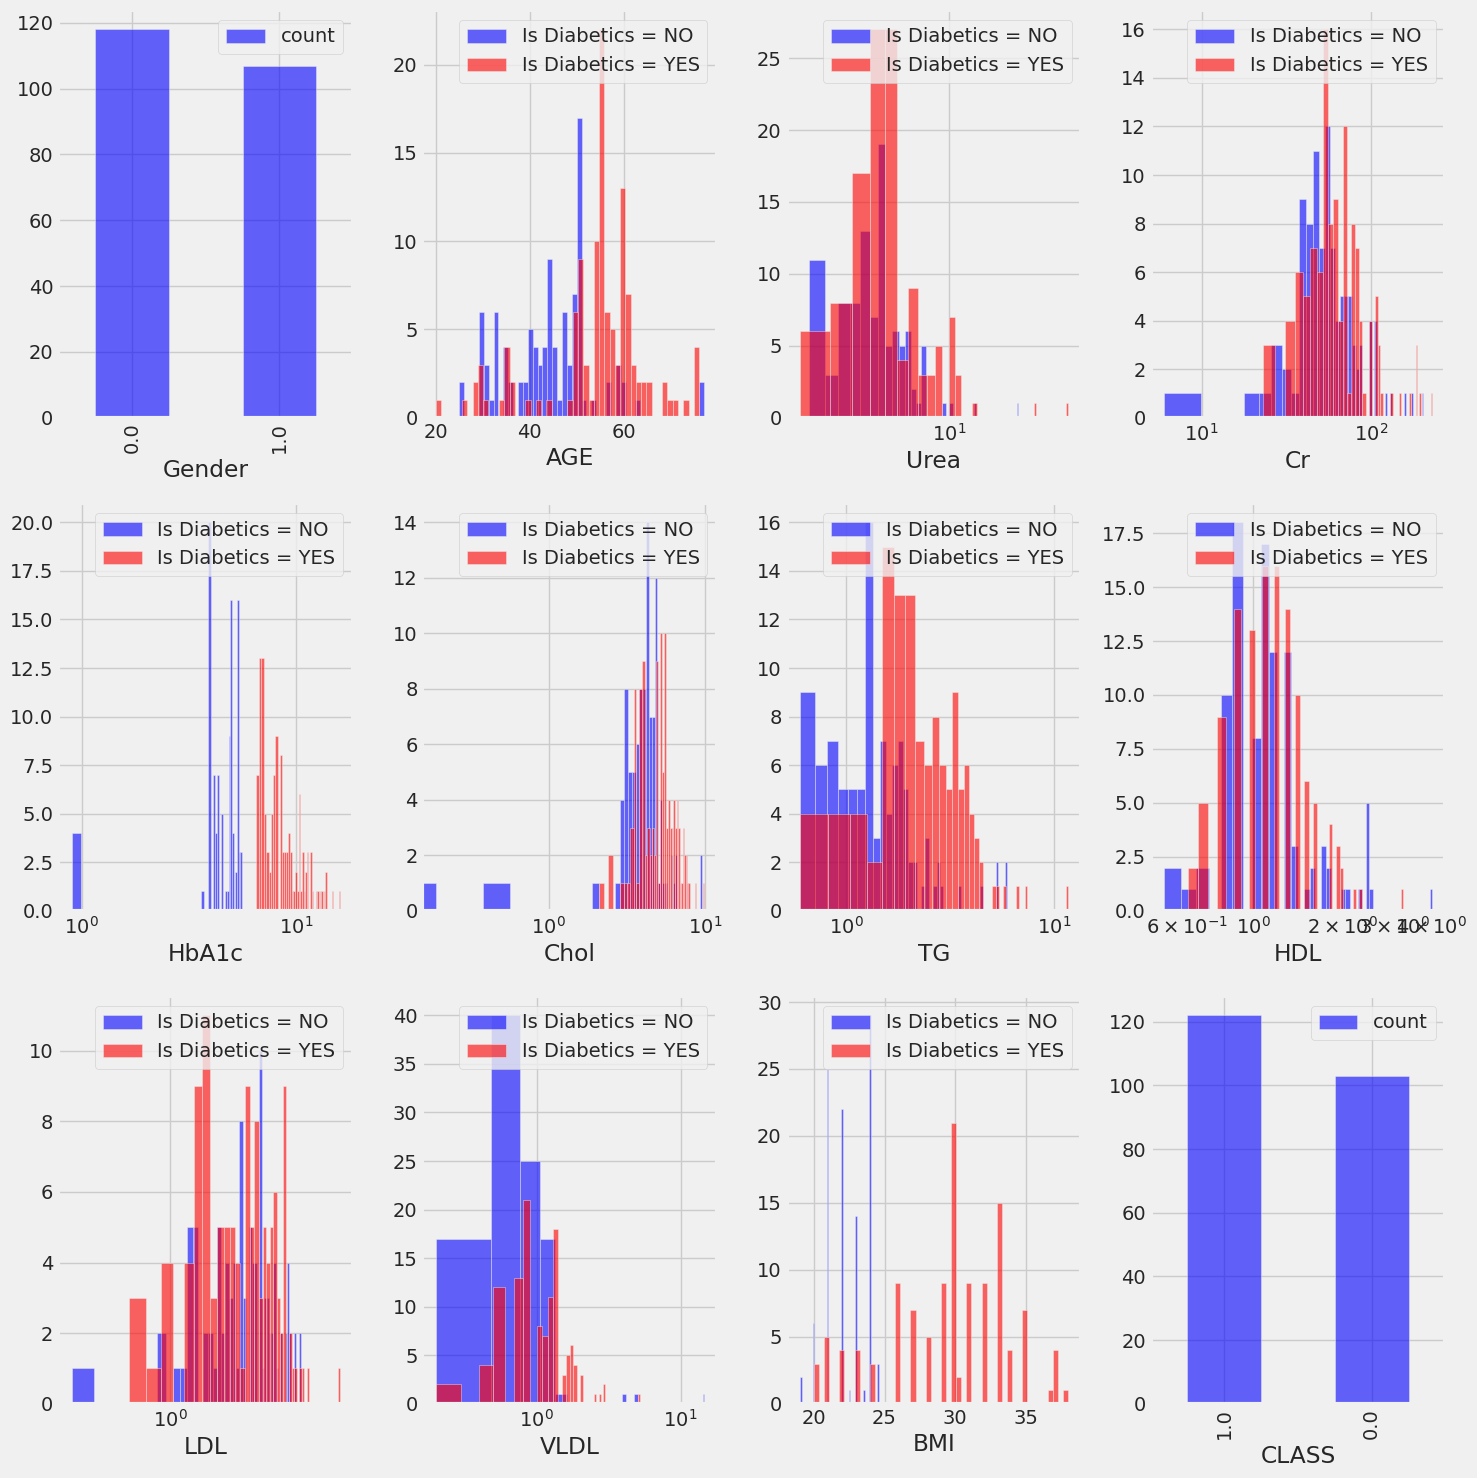

In [117]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    if column == 'Gender' or column == 'CLASS':
        data[column].value_counts().plot(kind='bar', color='blue', alpha=0.6)
    else:
        if data[column].nunique() < 20:  # zmienić liczbę przedziałów tylko jeśli unikalnych wartości < 20
            bins = 20
        else:
            bins = 50
        data[data["CLASS"] == '0.0'][column].hist(bins=bins, color='blue', label='Is Diabetics = NO', alpha=0.6)
        data[data["CLASS"] == '1.0'][column].hist(bins=bins, color='red', label='Is Diabetics = YES', alpha=0.6)
        if column in ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']:
            plt.xscale('log')  # zmiana skali na logarytmiczną dla wybranych kolumn
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
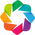

:Overlay
   .Bars.Count.I  :Bars   [Gender]   (count)
   .Bars.Count.II :Bars   [Gender]   (count)

In [119]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')


have_disease = data.loc[data['CLASS']==1, 'Gender'].value_counts().hvplot.bar(alpha=0.4)
no_disease = data.loc[data['CLASS']==0, 'Gender'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Diabetics by Gender", xlabel='Gender', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)


In [87]:
data.head()


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


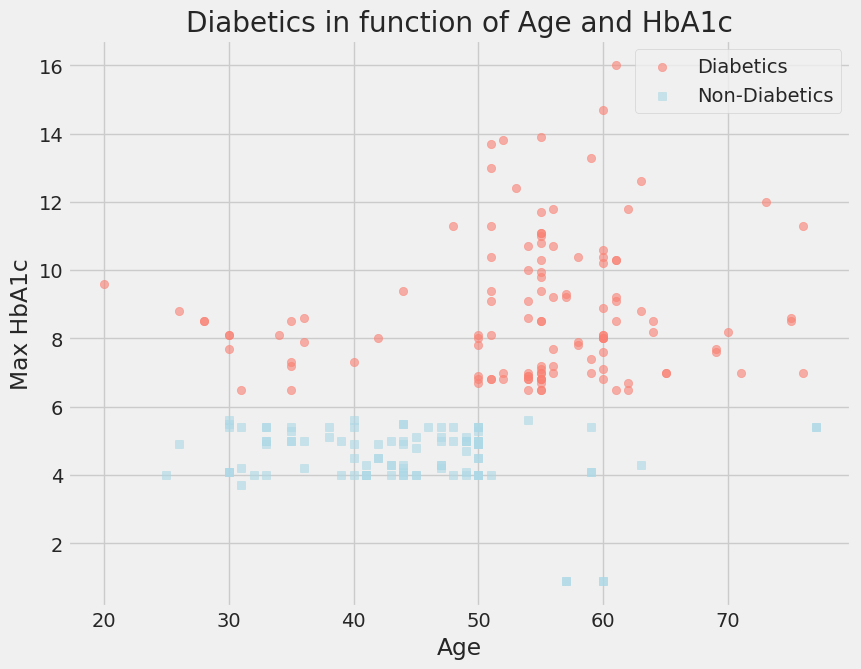

In [120]:
plt.figure(figsize=(9, 7))

plt.scatter(data.AGE[data.CLASS=='1.0'],
            data.HbA1c[data.CLASS=='1.0'],
            c="salmon",
            label="Diabetics",
            marker='o',
            alpha=0.6)

plt.scatter(data.AGE[data.CLASS=='0.0'],
            data.HbA1c[data.CLASS=='0.0'],
            c="lightblue",
            label="Non-Diabetics",
            marker='s',
            alpha=0.6)

plt.title("Diabetics in function of Age and HbA1c")
plt.xlabel("Age")
plt.ylabel("Max HbA1c")


plt.legend()

plt.grid(True)

plt.show()


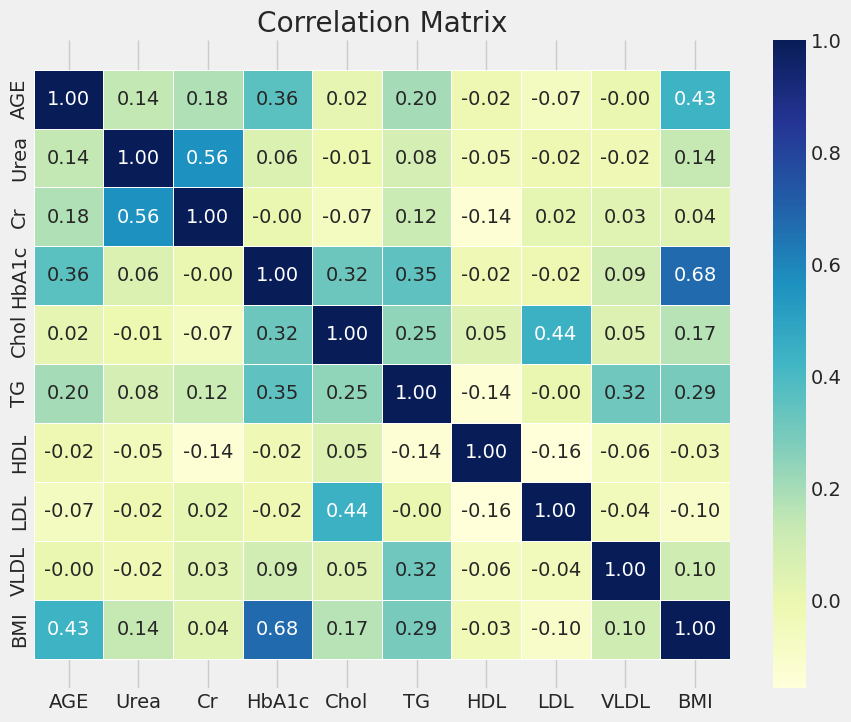

In [121]:

corr_matrix = data[numeric_columns].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("Correlation Matrix")
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
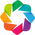

:Bars   [index]   (0)

In [131]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')


data_numeric = data.apply(pd.to_numeric, errors='coerce')


data_corr = data_numeric.corrwith(data_numeric['CLASS'])


data_corr.hvplot.barh(width=600, height=400,
                      title="Correlation between Diabetes and Numeric Features",
                      ylabel='Correlation', xlabel='Numeric Features')


In [135]:
categorical_val.remove('CLASS')
dataset = pd.get_dummies(data, columns = categorical_val)

In [136]:
dataset.head()

,CLASS,Gender_0.0,Gender_1.0,AGE_20.0,AGE_25.0,AGE_26.0,AGE_28.0,AGE_30.0,AGE_31.0,AGE_32.0,...,BMI_30.0,BMI_30.1,BMI_31.0,BMI_32.0,BMI_33.0,BMI_34.0,BMI_35.0,BMI_36.6,BMI_37.0,BMI_38.0
0,0.00,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.00,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.00,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.00,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.00,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
print(data.columns)
print(dataset.columns)


Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')
Index(['CLASS', 'Gender_0.0', 'Gender_1.0', 'AGE_20.0', 'AGE_25.0', 'AGE_26.0',
       'AGE_28.0', 'AGE_30.0', 'AGE_31.0', 'AGE_32.0',
       ...
       'BMI_30.0', 'BMI_30.1', 'BMI_31.0', 'BMI_32.0', 'BMI_33.0', 'BMI_34.0',
       'BMI_35.0', 'BMI_36.6', 'BMI_37.0', 'BMI_38.0'],
      dtype='object', length=476)


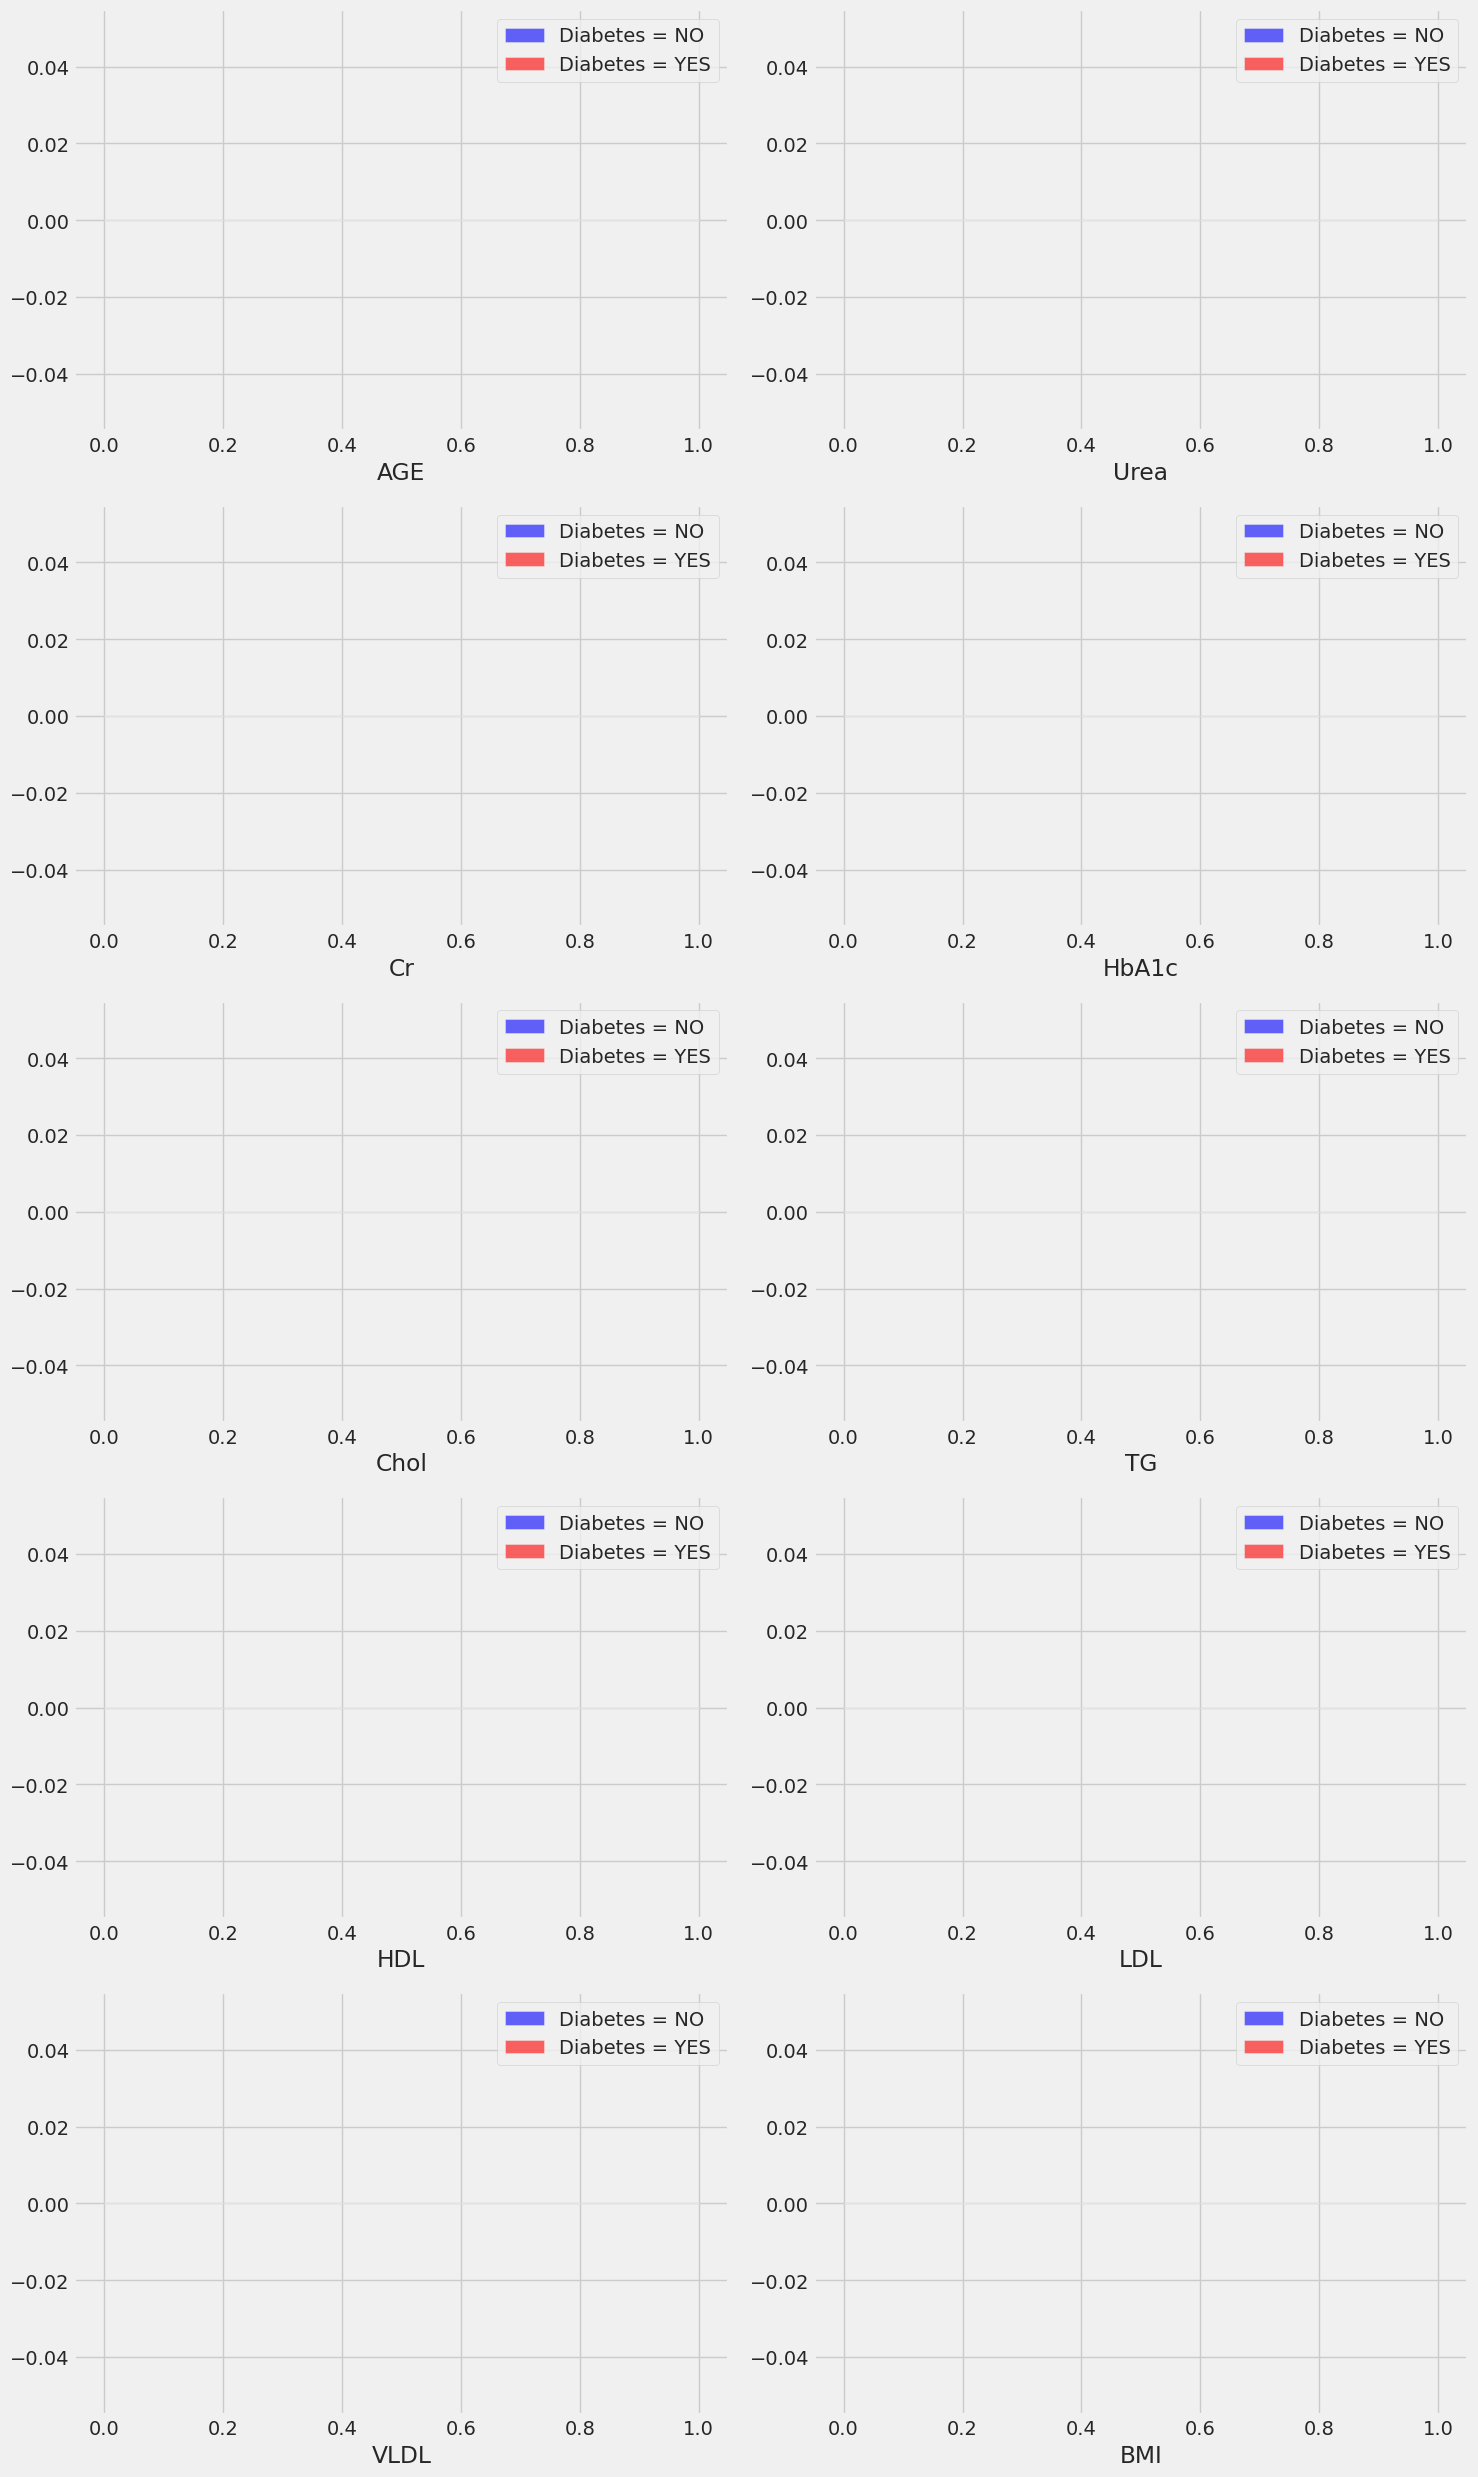

In [142]:
import matplotlib.pyplot as plt

continous_val = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Liczba wierszy i kolumn subplotów
rows = (len(continous_val) + 1) // 2
cols = 2

plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(continous_val, 1):
    plt.subplot(rows, cols, i)
    data[data["CLASS"] == '0.0'][column].hist(bins=35, color='blue', label='Diabetes = NO', alpha=0.6)
    data[data["CLASS"] == '1.0'][column].hist(bins=35, color='red', label='Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [148]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()

col_to_scale = []


for column in dataset.columns:
    for prefix in prefixes:
        if column.startswith(prefix):
            col_to_scale.append(column)
            break


dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
print("Kolumny zostały pomyślnie przeskalowane.")


Kolumny zostały pomyślnie przeskalowane.


In [149]:
dataset.head()

,CLASS,Gender_0.0,Gender_1.0,AGE_20.0,AGE_25.0,AGE_26.0,AGE_28.0,AGE_30.0,AGE_31.0,AGE_32.0,...,BMI_30.0,BMI_30.1,BMI_31.0,BMI_32.0,BMI_33.0,BMI_34.0,BMI_35.0,BMI_36.6,BMI_37.0,BMI_38.0
0,0.00,True,False,-0.07,-0.07,-0.09,-0.09,-0.20,-0.13,-0.07,...,-0.32,-0.09,-0.20,-0.20,-0.27,-0.13,-0.18,-0.07,-0.13,-0.07
1,0.00,False,True,-0.07,-0.07,10.56,-0.09,-0.20,-0.13,-0.07,...,-0.32,-0.09,-0.20,-0.20,-0.27,-0.13,-0.18,-0.07,-0.13,-0.07
2,0.00,True,False,-0.07,-0.07,-0.09,-0.09,-0.20,-0.13,-0.07,...,-0.32,-0.09,-0.20,-0.20,-0.27,-0.13,-0.18,-0.07,-0.13,-0.07
3,0.00,True,False,-0.07,-0.07,-0.09,-0.09,-0.20,-0.13,-0.07,...,-0.32,-0.09,-0.20,-0.20,-0.27,-0.13,-0.18,-0.07,-0.13,-0.07
4,0.00,False,True,-0.07,-0.07,-0.09,-0.09,-0.20,-0.13,-0.07,...,-0.32,-0.09,-0.20,-0.20,-0.27,-0.13,-0.18,-0.07,-0.13,-0.07


In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Podział danych na zbiory treningowy i testowy
X = data.drop('CLASS', axis=1)
y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [151]:
from sklearn.linear_model import LogisticRegression

# Tworzenie i trenowanie modelu
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

# Wydrukowanie wyników
print("Wyniki dla zbioru treningowego:")
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

print("\nWyniki dla zbioru testowego:")
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Wyniki dla zbioru treningowego:
Train Result:
Accuracy Score: 91.72%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.91  0.93      0.92       0.92          0.92
recall     0.92  0.92      0.92       0.92          0.92
f1-score   0.91  0.92      0.92       0.92          0.92
support   74.00 83.00      0.92     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[68  6]
 [ 7 76]]


Wyniki dla zbioru testowego:
Test Result:
Accuracy Score: 92.65%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.96  0.90      0.93       0.93          0.93
recall     0.86  0.97      0.93       0.92          0.93
f1-score   0.91  0.94      0.93       0.92          0.93
support   29.00 39.00      0.93      68.00         68.00
_______________________________________________
Confusion Matrix:

In [152]:
# Obliczenie dokładności dla zbioru treningowego i testowego
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Tworzenie ramki danych z wynikami
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65


In [155]:
from sklearn.neighbors import KNeighborsClassifier
# Tworzenie i trenowanie modelu KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Wyświetlanie wyników dla zbioru treningowego
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)

# Wyświetlanie wyników dla zbioru testowego
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.85  0.88      0.87       0.87          0.87
recall     0.86  0.87      0.87       0.87          0.87
f1-score   0.86  0.87      0.87       0.87          0.87
support   74.00 83.00      0.87     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[64 10]
 [11 72]]

Test Result:
Accuracy Score: 79.41%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.74  0.84      0.79       0.79          0.80
recall     0.79  0.79      0.79       0.79          0.79
f1-score   0.77  0.82      0.79       0.79          0.79
support   29.00 39.00      0.79      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[23  6]
 [ 8 31]]



In [157]:
# Obliczenie dokładności dla modelu K-nearest neighbors
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# Tworzenie DataFrame z wynikami
results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Dodanie wyników do wynikowego DataFrame
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41


In [158]:
from sklearn.svm import SVC

# Inicjalizacja modelu SVM
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

# Wyświetlenie wyników dla zbioru treningowego
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)

# Wyświetlenie wyników dla zbioru testowego
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 76.47%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.93  0.72      0.76       0.83          0.81
recall     0.48  0.97      0.76       0.73          0.76
f1-score   0.64  0.83      0.76       0.73          0.75
support   29.00 39.00      0.76      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[14 15]
 [ 1 38]]



In [166]:
# Jeśli wynikowy DataFrame nie istnieje, tworzymy nowy
if 'results_df' not in locals():
    results_df = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Obliczenie dokładności dla zbioru testowego i treningowego
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

# Przygotowanie wyników do DataFrame
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Dodanie wyników do DataFrame
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41
2,Support Vector Machine,100.00,76.47


In [168]:
from sklearn.tree import DecisionTreeClassifier

# Tworzenie modelu klasyfikatora drzewa decyzyjnego
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Wyświetlanie wyników klasyfikatora drzewa decyzyjnego
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   29.00 39.00      1.00      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[29  0]
 [ 0 39]]



In [169]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Obliczanie dokładności klasyfikatora drzewa decyzyjnego
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

# Tworzenie nowego DataFrame z wynikami
results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Dołączenie wyników do istniejącego DataFrame
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41
2,Support Vector Machine,100.00,76.47
3,Decision Tree Classifier,100.00,100.00


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inicjalizacja klasyfikatora lasu losowego
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Trenowanie modelu
rf_clf.fit(X_train, y_train)

# Ocena wyników na zbiorze treningowym i testowym
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   29.00 39.00      1.00      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[29  0]
 [ 0 39]]



In [174]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Obliczanie dokładności dla zbioru treningowego i testowego
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# Tworzenie ramki danych z wynikami
results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Dodawanie wyników do istniejącej ramki danych lub tworzenie nowej
if 'results_df' in locals():
    results_df = pd.concat([results_df, results_df_2], ignore_index=True)
else:
    results_df = results_df_2

results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41
2,Support Vector Machine,100.00,76.47
3,Decision Tree Classifier,100.00,100.00
4,Random Forest Classifier,100.00,100.00


In [176]:
from sklearn.preprocessing import LabelEncoder

# Tworzenie kopii danych
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Kodowanie kolumny 'Gender' za pomocą LabelEncoder
label_encoder = LabelEncoder()
X_train_encoded['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test_encoded['Gender'] = label_encoder.transform(X_test['Gender'])

# Inicjalizacja i trening modelu XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train_encoded, y_train)

print_score(xgb_clf, X_train_encoded, y_train, X_test_encoded, y_test, train=True)
print_score(xgb_clf, X_train_encoded, y_train, X_test_encoded, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   29.00 39.00      1.00      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[29  0]
 [ 0 39]]



In [177]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test_encoded)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train_encoded)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41
2,Support Vector Machine,100.00,76.47
3,Decision Tree Classifier,100.00,100.00
4,Random Forest Classifier,100.00,100.00
5,XGBoost Classifier,100.00,100.00


In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definicja parametrów do przeszukania siatki
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

# Inicjalizacja klasyfikatora
lr_clf = LogisticRegression()

# Utworzenie obiektu GridSearchCV
lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)

# Dopasowanie GridSearch do danych treningowych
lr_cv.fit(X_train, y_train)

# Wybór najlepszych parametrów
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

# Zastosowanie najlepszych parametrów do klasyfikatora
lr_clf = LogisticRegression(**best_params)

# Trening klasyfikatora z najlepszymi parametrami
lr_clf.fit(X_train, y_train)

# Wyświetlenie wyników
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 78.47599703514607, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   29.00 39.00      1.00      68.00         68.0

In [179]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.00,100.00


In [180]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


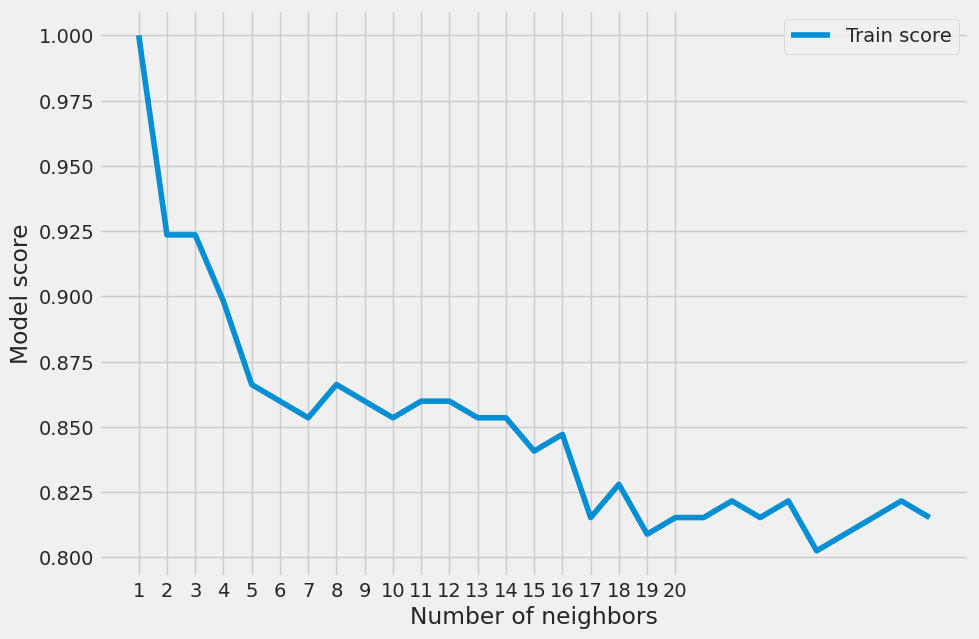

In [181]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [182]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.53%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.82  0.81      0.82       0.82          0.82
recall     0.78  0.84      0.82       0.81          0.82
f1-score   0.80  0.83      0.82       0.81          0.82
support   74.00 83.00      0.82     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[58 16]
 [13 70]]

Test Result:
Accuracy Score: 79.41%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  0.74  0.84      0.79       0.79          0.80
recall     0.79  0.79      0.79       0.79          0.79
f1-score   0.77  0.82      0.79       0.79          0.79
support   29.00 39.00      0.79      68.00         68.00
_______________________________________________
Confusion Matrix: 
 [[23  6]
 [ 8 31]]



In [190]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Inicjalizacja pustej listy
results_list = []

# Obliczenie wyników dla K-nearest neighbors
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# Dodanie wyników do listy
results_list.append(["Tuned K-nearest neighbors", train_score, test_score])

# Obliczenie wyników dla Logistic Regression
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Dodanie wyników dla Logistic Regression do listy
results_list.append(["Tuned Logistic Regression", train_score, test_score])

# Utworzenie DataFrame z listy wyników
tuning_results_df = pd.DataFrame(results_list, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Wyświetlenie ramki danych z wynikami tuningu
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned K-nearest neighbors,81.53,79.41
1,Tuned Logistic Regression,100.00,100.00


In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Inicjalizacja klasyfikatora SVM
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

# Definicja siatki parametrów do przeszukiwania
params = {
    "C": (0.1, 0.5, 1, 2, 5, 10, 20),
    "gamma": (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
    "kernel": ('linear', 'poly', 'rbf')
}

# Utworzenie obiektu GridSearchCV
svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")

# Dopasowanie siatki parametrów
svm_cv.fit(X_train, y_train)

# Najlepsze parametry
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

# Utworzenie klasyfikatora SVM z najlepszymi parametrami
svm_clf = SVC(**best_params)

# Trenowanie klasyfikatora
svm_clf.fit(X_train, y_train)

# Wyniki na zbiorze treningowym
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)

# Wyniki na zbiorze testowym
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 98.53%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  0.97      0.99       0.99          0.99
recall     0.97  1.00      0.99       0.98          0.99
f1-score   0.98  0.99      0.99       0.98          0.99
support   29.00 39.00      0.99      68.00         68.00
___

In [193]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Inicjalizacja pustej listy
results_list = []

# Obliczenie wyników dla K-nearest neighbors
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# Dodanie wyników dla K-nearest neighbors do listy
results_list.append(["Tuned K-nearest neighbors", train_score, test_score])

# Obliczenie wyników dla Logistic Regression
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Dodanie wyników dla Logistic Regression do listy
results_list.append(["Tuned Logistic Regression", train_score, test_score])

# Obliczenie wyników dla Support Vector Machine
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

# Dodanie wyników dla Support Vector Machine do listy
results_list.append(["Tuned Support Vector Machine", train_score, test_score])

# Utworzenie DataFrame z listy wyników
tuning_results_df = pd.DataFrame(results_list, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Wyświetlenie ramki danych z wynikami tuningu
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned K-nearest neighbors,81.53,79.41
1,Tuned Logistic Regression,100.00,100.00
2,Tuned Support Vector Machine,100.00,98.53


In [203]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Inicjalizacja pustej listy
results_list = []

# Obliczenie wyników dla K-nearest neighbors
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# Dodanie wyników dla K-nearest neighbors do listy
results_list.append(["Tuned K-nearest neighbors", train_score, test_score])

# Obliczenie wyników dla Logistic Regression
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Dodanie wyników dla Logistic Regression do listy
results_list.append(["Tuned Logistic Regression", train_score, test_score])

# Obliczenie wyników dla Support Vector Machine
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

# Dodanie wyników dla Support Vector Machine do listy
results_list.append(["Tuned Support Vector Machine", train_score, test_score])

# Obliczenie wyników dla drzewa decyzyjnego
params = {
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20))
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

# Obliczenie wyników dla drzewa decyzyjnego
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

# Dodanie wyników dla drzewa decyzyjnego do listy
results_list.append(["Tuned Decision Tree Classifier", train_score, test_score])

# Utworzenie DataFrame z listy wyników
tuning_results_df = pd.DataFrame(results_list, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Wyświetlenie ramki danych z wynikami tuningu
print(tuning_results_df)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
                            Model  Training Accuracy %  Testing Accuracy %
0       Tuned K-nearest neighbors                81.53               79.41
1       Tuned Logistic Regression               100.00              100.00
2    Tuned Support Vector Machine               100.00               98.53
3  Tuned Decision Tree Classifier               100.00              100.00


In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametry do przeszukiwania siatki
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Inicjalizacja modelu RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Utworzenie obiektu GridSearchCV
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)

# Dopasowanie modelu do danych
rf_cv.fit(X_train, y_train)

# Najlepsze parametry
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

# Ustawienie modelu RandomForestClassifier z najlepszymi parametrami
rf_clf = RandomForestClassifier(**best_params)

# Dopasowanie modelu do danych treningowych
rf_clf.fit(X_train, y_train)

# Wydrukowanie wyników dla danych treningowych i testowych
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [207]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Label Encoding dla kolumny "Gender"
label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])

# Parametry do przeszukiwania siatki
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

# Inicjalizacja modelu XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)

# Utworzenie obiektu RandomizedSearchCV
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Dopasowanie modelu do danych
xgb_cv.fit(X_train, y_train)

# Najlepsze parametry
best_params = xgb_cv.best_params_
print(f"Best parameters: {best_params}")

# Ustawienie modelu XGBClassifier z najlepszymi parametrami
xgb_clf = XGBClassifier(**best_params)

# Dopasowanie modelu do danych treningowych
xgb_clf.fit(X_train, y_train)

# Wydrukowanie wyników dla danych treningowych i testowych
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'learning_rate': 0.8313096125302398, 'max_depth': 9, 'n_estimators': 754}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   74.00 83.00      1.00     157.00        157.00
_______________________________________________
Confusion Matrix: 
 [[74  0]
 [ 0 83]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   29.00 39.00      

In [213]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

# Dodanie wyników dla drzewa decyzyjnego do listy
results_list.append(["Tuned Decision Tree Classifier", train_score, test_score])

# Utworzenie DataFrame z listy wyników
tuning_results_df = pd.DataFrame(results_list, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Wyświetlenie ramki danych z wynikami tuningu
print(tuning_results_df)


                            Model  Training Accuracy %  Testing Accuracy %
0       Tuned K-nearest neighbors                81.53               79.41
1       Tuned Logistic Regression               100.00              100.00
2    Tuned Support Vector Machine               100.00               98.53
3  Tuned Decision Tree Classifier               100.00              100.00
4  Tuned Decision Tree Classifier               100.00              100.00


In [214]:
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.72,92.65
1,K-nearest neighbors,86.62,79.41
2,Support Vector Machine,100.00,76.47
3,Decision Tree Classifier,100.00,100.00
4,Random Forest Classifier,100.00,100.00
5,XGBoost Classifier,100.00,100.00


In [215]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

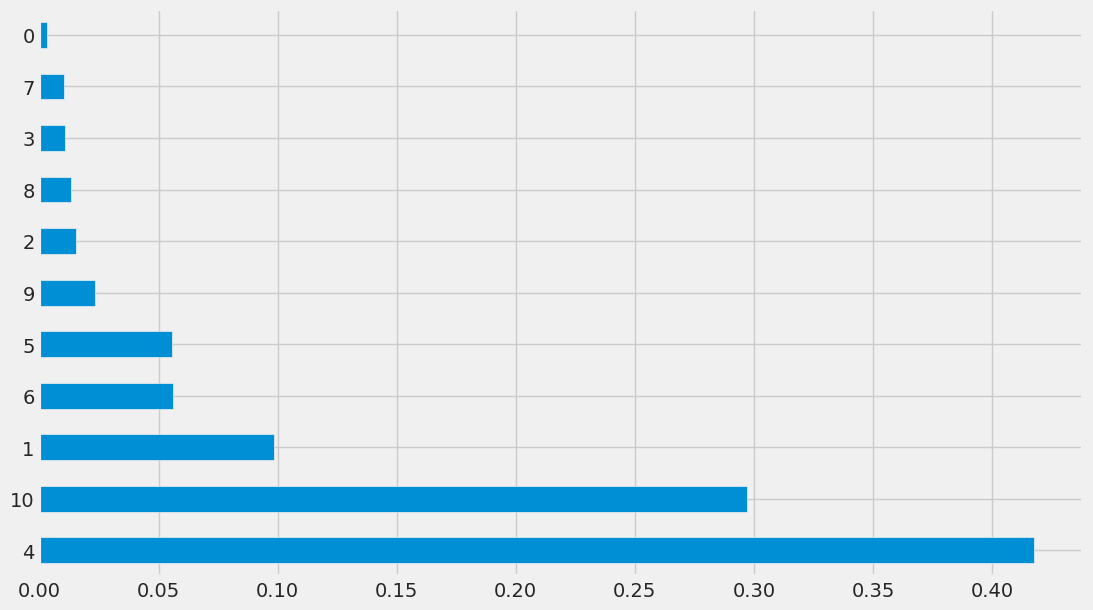

In [217]:
# Dopasowanie modelu RandomForestClassifier do danych treningowych
rf_clf.fit(X_train, y_train)

# Wygenerowanie wagi cech
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)


<Axes: >

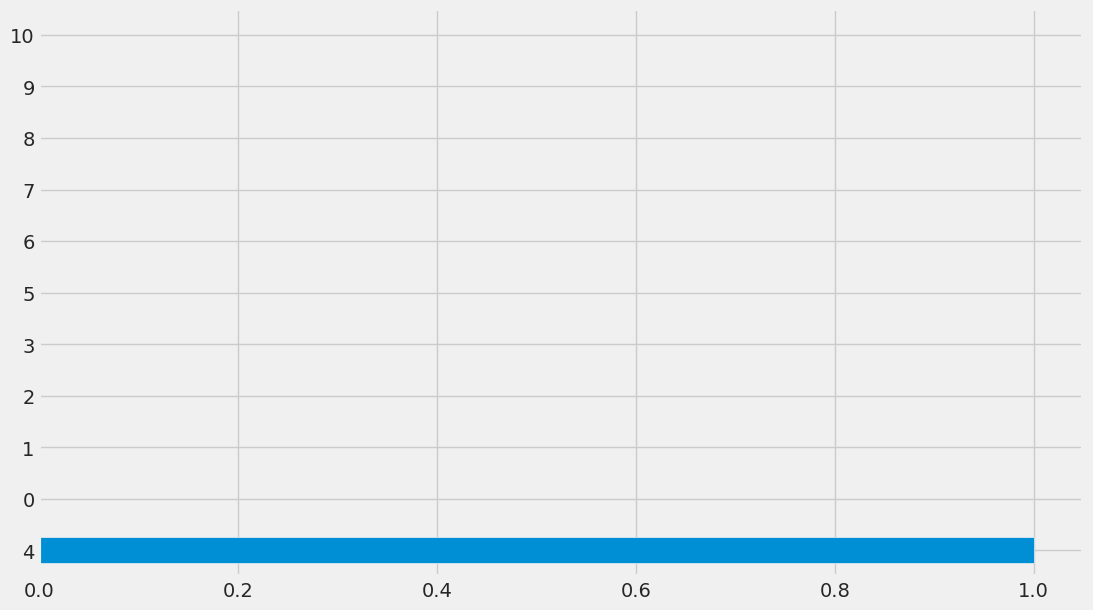

In [218]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)